# Table of Contents
 <p><div class="lev2"><a href="#Unconstrained-minimization-of-multivariate-scalar-functions-(minimize)"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Unconstrained minimization of multivariate scalar functions (minimize)</a></div><div class="lev2"><a href="#Unconstrained-minimization-of-multivariate-scalar-functions-(minimize)"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Unconstrained minimization of multivariate scalar functions (minimize)</a></div><div class="lev3"><a href="#BFGS-(Broyden–Fletcher–Goldfarb–Shanno-algorithm)"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>BFGS (Broyden–Fletcher–Goldfarb–Shanno algorithm)</a></div><div class="lev3"><a href="#L-BFGS-B-:-Limited-memory-BFGS"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>L-BFGS-B : Limited-memory BFGS</a></div><div class="lev3"><a href="#SLSQP-:-Sequential-Least-Squares-Programming"><span class="toc-item-num">0.2.3&nbsp;&nbsp;</span>SLSQP : Sequential Least Squares Programming</a></div><div class="lev2"><a href="#least-square"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>least square</a></div><div class="lev4"><a href="#ftol"><span class="toc-item-num">0.3.0.1&nbsp;&nbsp;</span>ftol</a></div><div class="lev4"><a href="#x_scale"><span class="toc-item-num">0.3.0.2&nbsp;&nbsp;</span>x_scale</a></div><div class="lev3"><a href="#Trust-Region-Reflective-algorithm"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Trust Region Reflective algorithm</a></div><div class="lev2"><a href="#References"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>References</a></div>

## Unconstrained minimization of multivariate scalar functions (minimize)


## Unconstrained minimization of multivariate scalar functions (minimize)


minimizeのデフォルトでは、BFGS, L-BFGS-B, SLSQPのなかから、境界条件があるかどうかで適切なアルゴリズムが選ばれる。

least_squaresでは異なる。Trust Region Reflective algorithm

### BFGS (Broyden–Fletcher–Goldfarb–Shanno algorithm)

https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

非制約非線形最適化問題を解く反復法のひとつ。



### L-BFGS-B : Limited-memory BFGS
https://en.wikipedia.org/wiki/Limited-memory_BFGS#L-BFGS-B

L-BFGSは、BFGSを近似した、準ニュートン法に属する最適化アルゴリズムのひとつ。

範囲制約を扱えるように拡張したのが、L-BFGS-B



### SLSQP : Sequential Least Squares Programming

http://www.pyopt.org/reference/optimizers.slsqp.html

B行列の更新にBFGSを、ステップ長アルゴリズムにL1-test関数を使った、Han-Powell 準ニュートン法によるアルゴリズム

## least square

$\min_{x} \frac{1}{2} \sum_{i=1}^{m} \rho (f_{i}(x)^{2})$

$\rm{lb} \leq x \leq \rm{ub}$の条件の中でxを求める。

iはデータ点の数。$f_{i}(x)$は$R^{n}\rightarrow R$

least-squares最小化の手法はヤコビアン$J_{ij}=\frac{\partial f_{i}}{\partial x_{j}}$を活用する。引数に与えられないと推定するが、うまくいかないことがある。





次の3つのアルゴリズムから適宜選ぶ

1. Trust Region Reflective algorithm
2. dogleg algorithm with rectangular trust regions
3. Levenberg-Marquardt algorithm




`ftol` termination condition is satisfied.
Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.
[ 0.19280596  0.19130423  0.12306063  0.13607247]


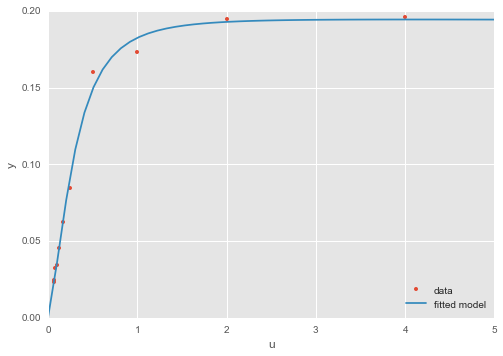

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
# res = least_squares(fun, x0, bounds=(0, 100), args=(u, y), verbose=1)
# res = least_squares(fun, x0, bounds=(0, 100), args=(u, y), verbose=1, x_scale=[1.0E-15,1.0E-15,1.0E-15, 1.0E-15 ])

print(res.x)

u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

引数

#### ftol
dF < ftol * Fになったら更新が終わる

dF : 
F : 

#### x_scale

### Trust Region Reflective algorithm
信頼領域：ある関数$f:\mathcal{R}^{N}\rightarrow \mathcal{R}$の最小値を求めるときに、ある点xの近傍においてfを簡単な関数qで近似する。この近傍領域を信頼領域(trust region)と呼ぶ。

これによって、信頼領域Nにおいて最小の値を探す、部分問題になる。

$\rm{argmin}_{s}{q(s), s\in N}$

f(x+s) < f(x)ならx+sに値がアップデートされ、そうでない場合はxのままで信頼領域Nが小さくなり計算が進められる。

問題は

* qをどう近似するか
* Nをどう選ぶ・更新するか
* 部分問題でどれくらい正確に計算するか




## References
1. [scipy: Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
2. [mathworks:シミュレーションまたは常微分方程式の最適化](https://jp.mathworks.com/help/optim/ug/optimizing-a-simulation-or-ordinary-differential-equation.html)